# Tutorial: Data preprocessing

In [2]:
import pandas as pd

## Load UCI Data
UCI Adult data are going to be used in this tutorial. The data contain both numerical and categorical features, and the target to predict is whether a person makes over 50K a year. It is a very simple binary classification task.

In [3]:
from catboost.datasets import adult
train, test = adult()


In [4]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18.0,NaN,103497.0,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [6]:
from kuma_utils.visualization import explore_data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


data shape: (32561, 15), None

Included columns: 
['workclass', 'occupation', 'native-country', 'capital-gain', 'marital-status',
 'capital-loss', 'hours-per-week', 'education-num', 'income', 'race', 'fnlwgt',
 'sex', 'age', 'relationship', 'education'] (15)

  0 workclass: 
                              _item        _type          _stat
1         workclass=Local-gov, n(%)  categorical    2093 (6.4%)
2               workclass=NaN, n(%)  categorical    1836 (5.6%)
3      workclass=Never-worked, n(%)  categorical       7 (0.0%)
4           workclass=Private, n(%)  categorical  22696 (69.7%)
5      workclass=Self-emp-inc, n(%)  categorical    1116 (3.4%)
6  workclass=Self-emp-not-inc, n(%)  categorical    2541 (7.8%)
7         workclass=State-gov, n(%)  categorical    1298 (4.0%)
8       workclass=Without-pay, n(%)  categorical      14 (0.0%)
  1 occupation: 
                                 _item        _type         _stat
1        occupation=Armed-Forces, n(%)  categorical      9 (0.0%)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  4 marital-status: 
                                        _item        _type          _stat
1      marital-status=Married-AF-spouse, n(%)  categorical      23 (0.1%)
2     marital-status=Married-civ-spouse, n(%)  categorical  14976 (46.0%)
3  marital-status=Married-spouse-absent, n(%)  categorical     418 (1.3%)
4          marital-status=Never-married, n(%)  categorical  10683 (32.8%)
5              marital-status=Separated, n(%)  categorical    1025 (3.1%)
6                marital-status=Widowed, n(%)  categorical     993 (3.0%)
  5 capital-loss: 

 train NaN: 0 (0.000)
                     _item      _type             _stat
1  capital-loss, mean(std)  numerical  87.304 (402.954)
  6 hours-per-week: 

 train NaN: 0 (0.000)
                       _item      _type            _stat
1  hours-per-week, mean(std)  numerical  40.437 (12.347)
  7 education-num: 

 train NaN: 0 (0.000)
                      _item      _type           _stat
1  education-num, mean(std)  numerical  10.081 (2.5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  8 income: 
               _item        _type         _stat
1  income=>50K, n(%)  categorical  7841 (24.1%)
  9 race: 
                           _item        _type          _stat
1  race=Asian-Pac-Islander, n(%)  categorical    1039 (3.2%)
2               race=Black, n(%)  categorical    3124 (9.6%)
3               race=Other, n(%)  categorical     271 (0.8%)
4               race=White, n(%)  categorical  27816 (85.4%)
 10 fnlwgt: 

 train NaN: 0 (0.000)
               _item      _type                    _stat
1  fnlwgt, mean(std)  numerical  189778.367 (105548.357)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 11 sex: 
            _item        _type          _stat
1  sex=Male, n(%)  categorical  21790 (66.9%)
 12 age: 

 train NaN: 0 (0.000)
            _item      _type            _stat
1  age, mean(std)  numerical  38.582 (13.640)
 13 relationship: 
                               _item        _type         _stat
1   relationship=Not-in-family, n(%)  categorical  8305 (25.5%)
2  relationship=Other-relative, n(%)  categorical    981 (3.0%)
3       relationship=Own-child, n(%)  categorical  5068 (15.6%)
4       relationship=Unmarried, n(%)  categorical  3446 (10.6%)
5            relationship=Wife, n(%)  categorical   1568 (4.8%)
 14 education: 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                           _item        _type          _stat
1           education=11th, n(%)  categorical    1175 (3.6%)
2           education=12th, n(%)  categorical     433 (1.3%)
3        education=1st-4th, n(%)  categorical     168 (0.5%)
4        education=5th-6th, n(%)  categorical     333 (1.0%)
5        education=7th-8th, n(%)  categorical     646 (2.0%)
6            education=9th, n(%)  categorical     514 (1.6%)
7     education=Assoc-acdm, n(%)  categorical    1067 (3.3%)
8      education=Assoc-voc, n(%)  categorical    1382 (4.2%)
9      education=Bachelors, n(%)  categorical   5355 (16.4%)
10     education=Doctorate, n(%)  categorical     413 (1.3%)
11       education=HS-grad, n(%)  categorical  10501 (32.3%)
12       education=Masters, n(%)  categorical    1723 (5.3%)
13     education=Preschool, n(%)  categorical      51 (0.2%)
14   education=Prof-school, n(%)  categorical     576 (1.8%)
15  education=Some-college, n(%)  categorical   7291 (22.4%)


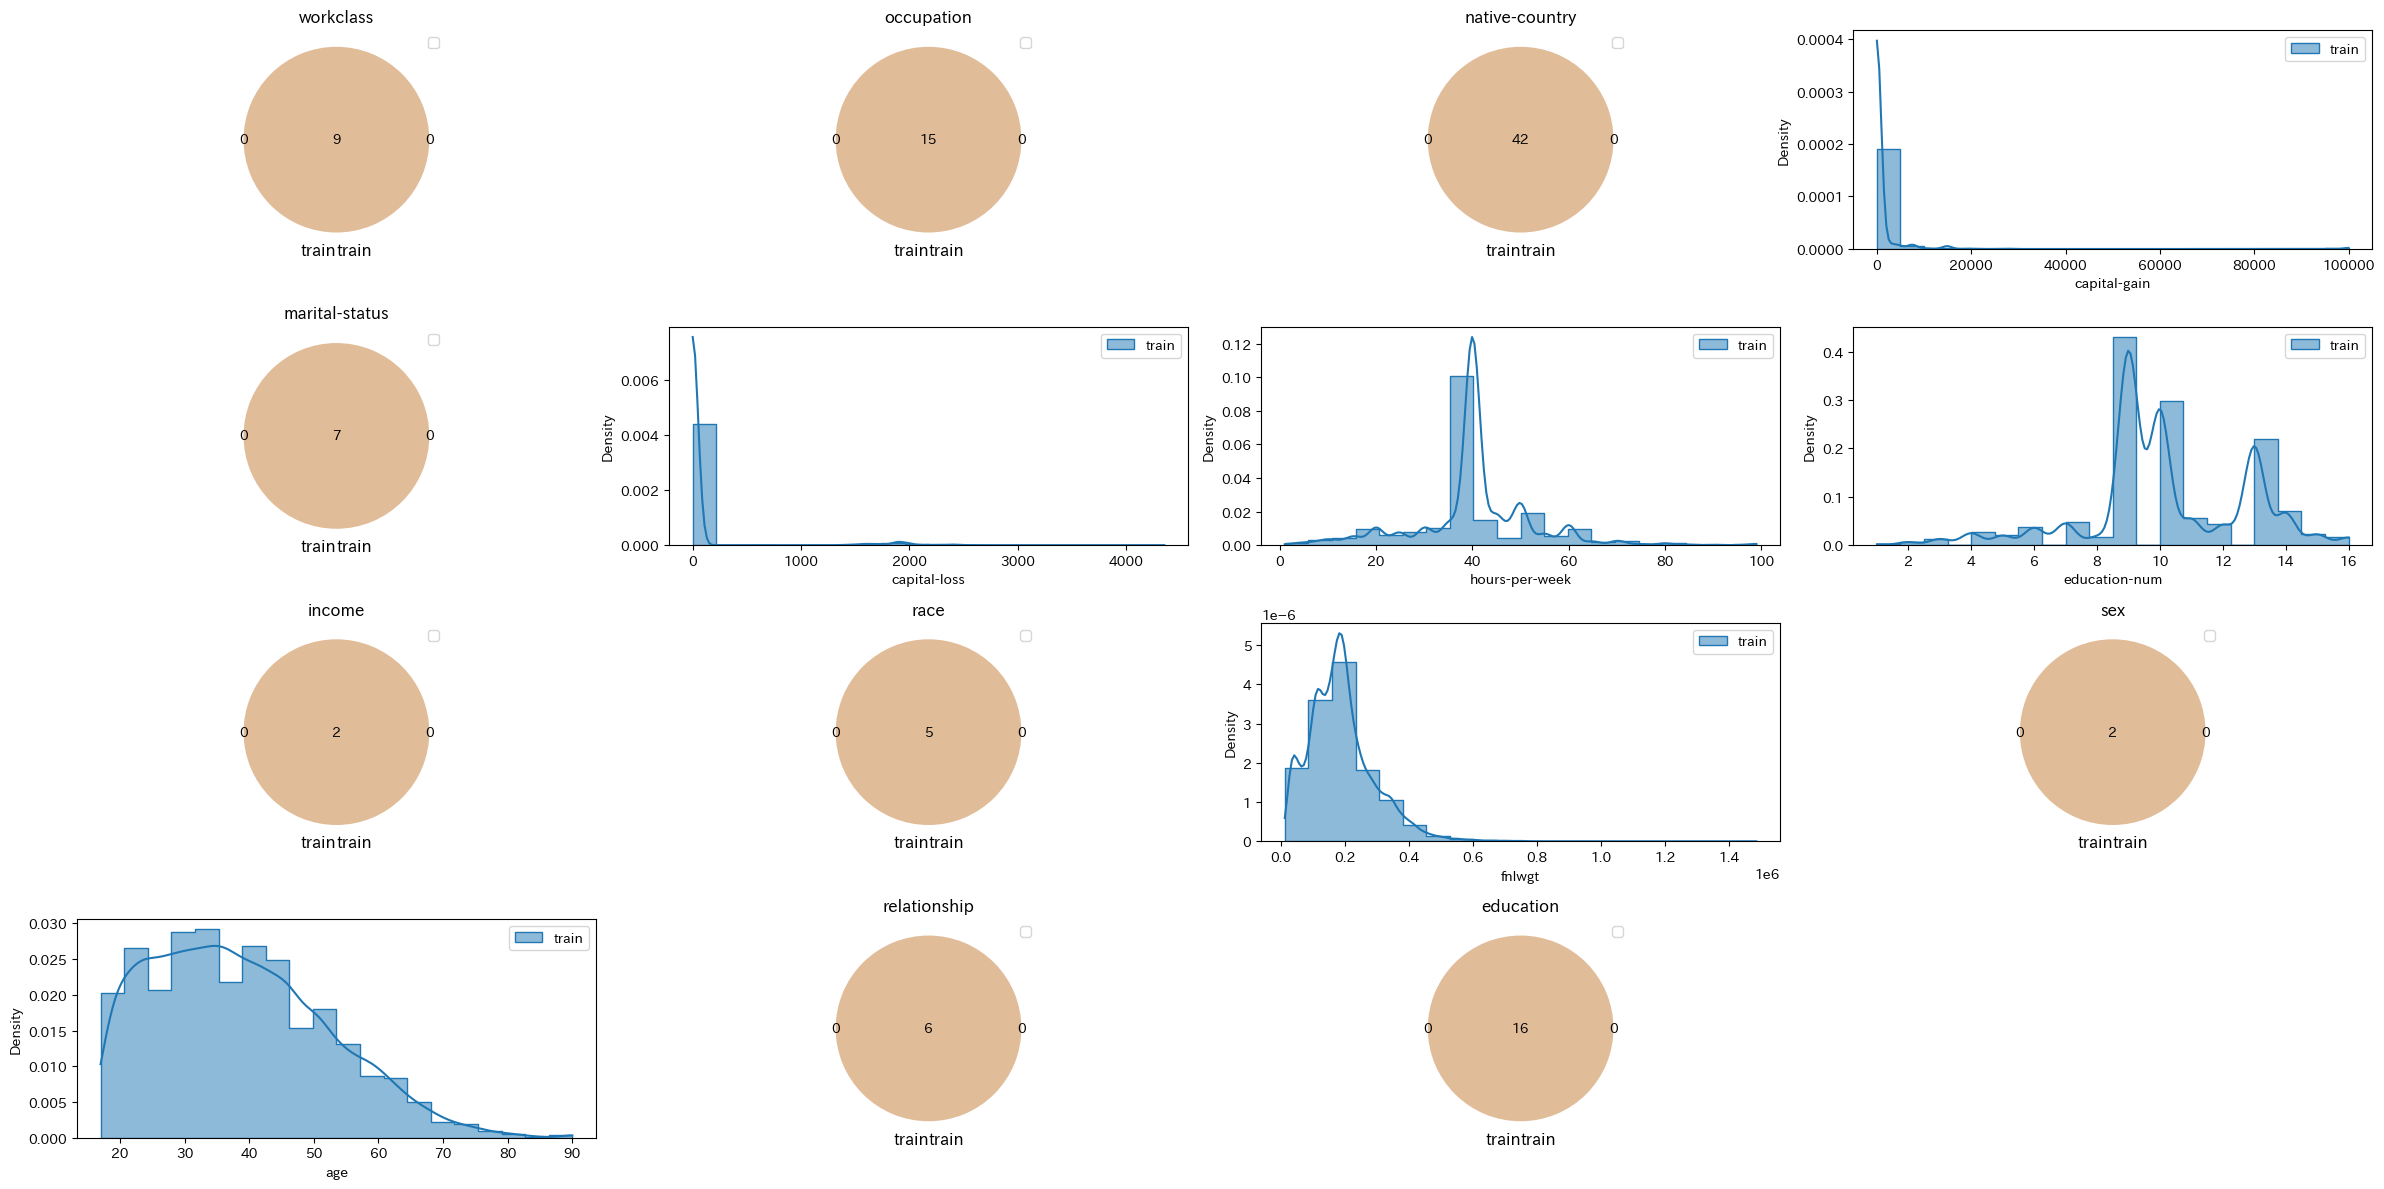

In [7]:
explore_data(
    train, exclude_columns=[])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


data shape: (32561, 15), (16281, 15)

Included columns: 
['sex', 'workclass', 'occupation', 'education', 'marital-status',
 'relationship', 'age', 'education-num', 'race', 'income', 'fnlwgt',
 'native-country', 'capital-gain', 'capital-loss', 'hours-per-week'] (15)

  0 sex: 
            _item        _type _stat_test          train           test  \
1  sex=Male, n(%)  categorical       Chi2  21790 (66.9%)  10860 (66.7%)   

    p-value  
1  0.638279  
  1 workclass: 
                              _item        _type _stat_test          train  \
1         workclass=Local-gov, n(%)  categorical       Chi2    2093 (6.4%)   
2               workclass=NaN, n(%)  categorical       Chi2    1836 (5.6%)   
3      workclass=Never-worked, n(%)  categorical       Chi2       7 (0.0%)   
4           workclass=Private, n(%)  categorical       Chi2  22696 (69.7%)   
5      workclass=Self-emp-inc, n(%)  categorical       Chi2    1116 (3.4%)   
6  workclass=Self-emp-not-inc, n(%)  categorical       Chi2 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                               _item        _type _stat_test         train  \
1   relationship=Not-in-family, n(%)  categorical       Chi2  8305 (25.5%)   
2  relationship=Other-relative, n(%)  categorical       Chi2    981 (3.0%)   
3       relationship=Own-child, n(%)  categorical       Chi2  5068 (15.6%)   
4       relationship=Unmarried, n(%)  categorical       Chi2  3446 (10.6%)   
5            relationship=Wife, n(%)  categorical       Chi2   1568 (4.8%)   

           test   p-value  
1  4278 (26.3%)  0.068230  
2    525 (3.2%)  0.211755  
3  2513 (15.4%)  0.719429  
4  1679 (10.3%)  0.365905  
5    763 (4.7%)  0.542822  
  6 age: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000

            _item      _type _stat_test            train             test  \
1  age, mean(std)  numerical          U  38.582 (13.640)  38.767 (13.849)   

    p-value  
1  0.322386  
  7 education-num: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000

                      _item      _type _stat_test           tr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


  8 race: 
                           _item        _type _stat_test          train  \
1  race=Asian-Pac-Islander, n(%)  categorical       Chi2    1039 (3.2%)   
2               race=Black, n(%)  categorical       Chi2    3124 (9.6%)   
3               race=Other, n(%)  categorical       Chi2     271 (0.8%)   
4               race=White, n(%)  categorical       Chi2  27816 (85.4%)   

            test   p-value  
1     480 (2.9%)  0.152996  
2    1561 (9.6%)  0.994834  
3     135 (0.8%)  1.000000  
4  13946 (85.7%)  0.503310  
  9 income: 
               _item        _type _stat_test         train          test  \
1  income=>50K, n(%)  categorical       Chi2  7841 (24.1%)  3846 (23.6%)   

    p-value  
1  0.267889  
 10 fnlwgt: 

 train NaN: 0 (0.000)
 test NaN: 0 (0.000

               _item      _type _stat_test                    train  \
1  fnlwgt, mean(std)  numerical          U  189778.367 (105548.357)   

                      test   p-value  
1  189435.678 (105711.661)  0.57103

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


 11 native-country: 
                                              _item        _type _stat_test  \
1                       native-country=Canada, n(%)  categorical       Chi2   
2                        native-country=China, n(%)  categorical       Chi2   
3                     native-country=Columbia, n(%)  categorical       Chi2   
4                         native-country=Cuba, n(%)  categorical       Chi2   
5           native-country=Dominican-Republic, n(%)  categorical       Chi2   
6                      native-country=Ecuador, n(%)  categorical       Chi2   
7                  native-country=El-Salvador, n(%)  categorical       Chi2   
8                      native-country=England, n(%)  categorical       Chi2   
9                       native-country=France, n(%)  categorical       Chi2   
10                     native-country=Germany, n(%)  categorical       Chi2   
11                      native-country=Greece, n(%)  categorical       Chi2   
12                   native-cou

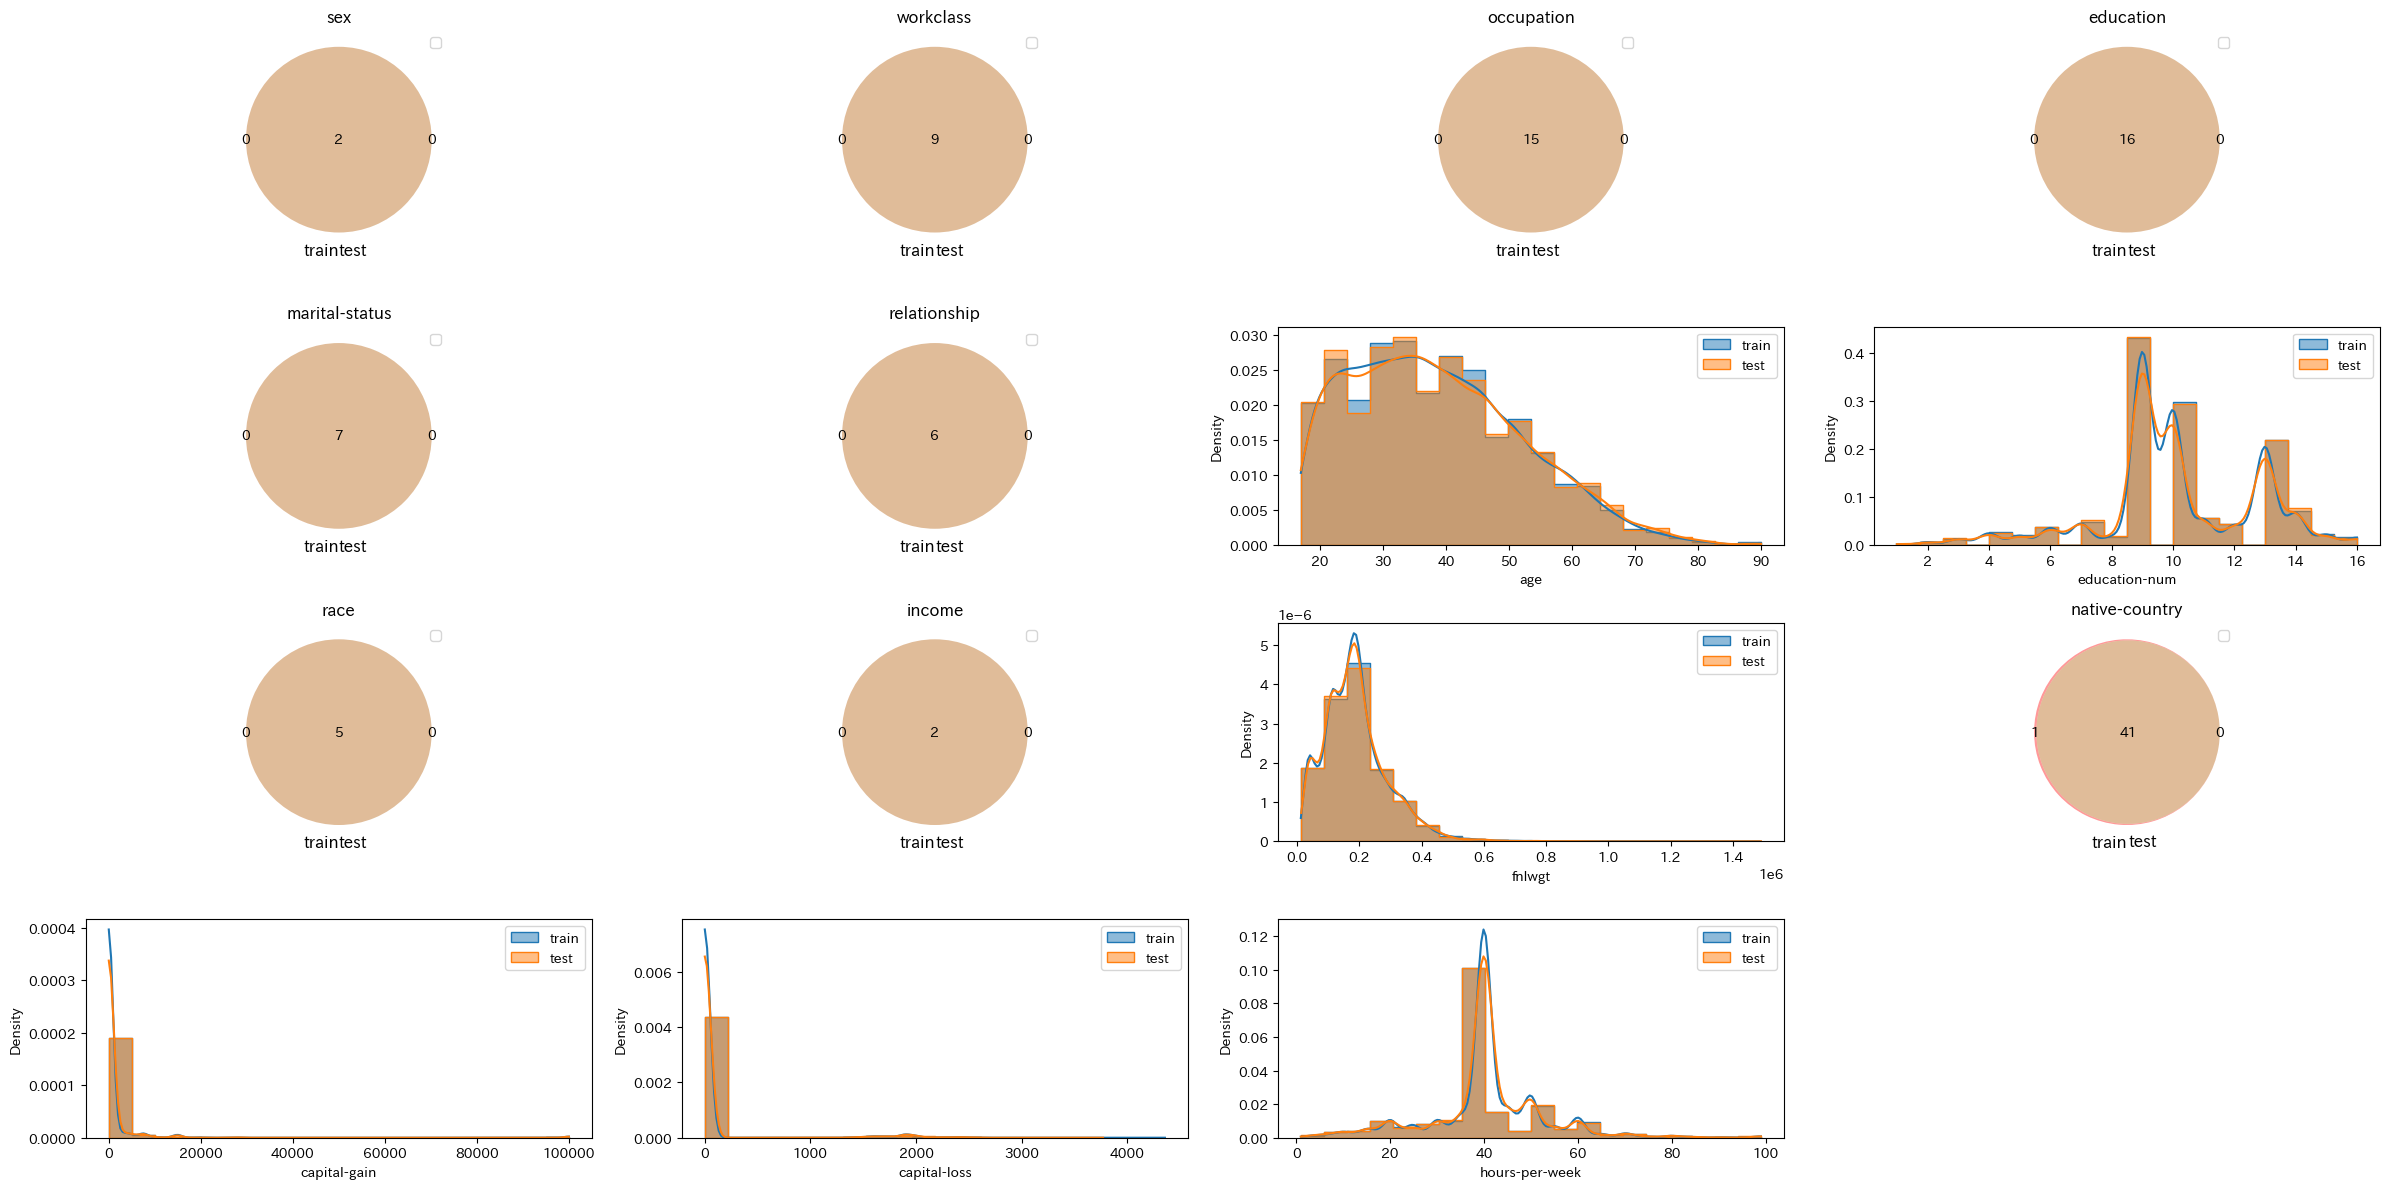

In [8]:
explore_data(
    train, test, exclude_columns=[])

In [ ]:
explore_data(
    train, test, exclude_columns=[], 
    use_wandb=True, wandb_params={'project': 'kuma_utils_eda_demo'})

![eda_wandb](images/eda_wandb.png)